In [1]:
header = ['DateTime','TA','TA_flag','FC','FC_flag','H','H_flag','LE','LE_flag','RH','RH_flag','VPD','VPD_flag','Rg',
          'Rg_flag','RE','RE_flag','GPP','GPP_flag']

In [2]:
import glob

In [3]:
files = glob.glob('./data/vcm_flux/*.csv')

In [4]:
files

['./data/vcm_flux/Tower_Vcm_2007_gapfilled.csv',
 './data/vcm_flux/Tower_Vcm_2008_gapfilled.csv',
 './data/vcm_flux/Tower_Vcm_2009_gapfilled.csv',
 './data/vcm_flux/Tower_Vcm_2010_gapfilled.csv',
 './data/vcm_flux/Tower_Vcm_2011_gapfilled.csv']

In [5]:
fl = files[0]
data = pd.read_csv(fl,skiprows=2, names=header, na_values=-9999)
data.index = pd.DatetimeIndex(data.DateTime)

In [6]:
data.head()

,DateTime,TA,TA_flag,FC,FC_flag,H,H_flag,LE,LE_flag,RH,RH_flag,VPD,VPD_flag,Rg,Rg_flag,RE,RE_flag,GPP,GPP_flag
2007-01-01 00:00:00,1/1/2007 0:00,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1
2007-01-01 00:30:00,1/1/2007 0:30,NaN,0,-0.450148,0,-113.127395,0,51.829996,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2007-01-01 01:00:00,1/1/2007 1:00,NaN,0,-0.566519,0,-95.376537,0,39.782510,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2007-01-01 01:30:00,1/1/2007 1:30,-2.0462,0,-0.356787,0,-99.579611,0,47.567231,0,36.924,0,0.331644,0,-0.06,0,0.17028,0,0.527067,0
2007-01-01 02:00:00,1/1/2007 2:00,-1.7292,0,-0.267939,0,-87.790645,0,39.630945,0,31.868,0,0.366724,0,-0.06,0,0.17167,0,0.439609,0


In [7]:
data = pd.DataFrame(columns=header)

for fl in files:
    tmp = pd.read_csv(fl,skiprows=2, names=header, na_values=-9999)
    tmp.index = pd.DatetimeIndex(tmp.DateTime)
    data = data.append(tmp)

In [8]:
def le2etEC(x):
    #Apply on daily total LE [W/m2]
    # from Ecological Climatology p.193
    cond = 2500.8-(2.36*x.TA)+(0.0016*(x.TA**2))+(0.00006*(x.TA**3)) #J/g latent head as a fxn of temperature
    cond *= 1000. # convert J/g -> J/kg
    #hv = 2.454*(10**6) # latent heat of vaporization
    ET = x.LE/cond # compute ET as kg/m2/s
    ET *= 86400. # number of seconds in a day
    
    return ET  # mm/m2

In [9]:
data2 = data.resample('D', how=np.nanmean)

/Users/barnhatb/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [11]:
data['ET'] = data.apply(le2etEC,axis=1)

In [10]:
data2['ET'] = data2.apply(le2etEC,axis=1)

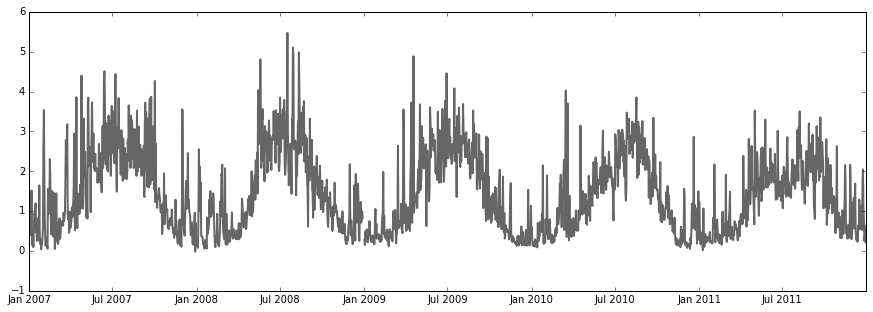

In [12]:
plt.figure(figsize=(15,5))
plt.plot(data2.index, data2.ET,lw=2,c='0.4')

In [13]:
data.to_pickle('./data/VCM_half_hour.pcl')
data2.to_pickle('./data/VCM.pcl')